# Analiza exploratorie a datelor cu Pandas

## Ce include acest Notebook?
1. Introducere - funcționalitățile principale în Pandas
2. Reusurse utile

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1. Introducere - funcționalitățile principale în Pandas
**[Pandas](http://pandas.pydata.org)** este o bibliotecă Python care oferă mijloace extinse pentru analiza datelor. Data Scientiștii lucrează adesea cu date stocate în formate de tabel precum `.csv`, `.tsv`, sau `.xlsx`. Pandas face foarte convenabilă încărcarea, procesarea și analiza unor astfel de date tabelare folosind interogări de tip SQL. Împreună cu `Matplotlib`, `Pandas` oferă o gamă largă de posibilități de analiză vizuală a datelor tabelare.

Principalele structuri de date din `Pandas` sunt implementate cu clasele **Series** și **DataFrame**. Prima este un array indexat de un anumit tip de date fixe. Cea de-a doua este o structură de date bidimensională - un tabel - în care fiecare coloană conține date de același tip. O puteți vedea ca pe un dicționar de instanțe `Series`. `DataFrames` sunt excelente pentru reprezentarea datelor reale: rândurile corespund instanțelor (exemple, observații , puncte, etc.), iar coloanele corespund caracteristicilor acestor instanțe.

In [ ]:
import numpy as np
import pandas as pd

pd.set_option("display.precision", 2)

Vom demonstra principalele metode în acțiune prin analizarea unui [set de date](https://bigml.com/user/francisco/gallery/dataset/5163ad540c0b5e5b22000383) care conține rata de dezabonare a clienților operatorilor de telecomunicații. Să citim datele (folosind `read_csv`) și să ne uităm la primele 5 linii folosind metoda `head`:

In [ ]:
df = pd.read_csv("/content/drive/My Drive/shared/tekwill_ml_course/lesson03/telecom_churn.csv")
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


În Jupyter notebooks, Pandas DataFrames sunt afișate sub forma acestor tabele user-friendly de mai sus, în timp ce `print(df.head())` este mai puțin user-friendly formatat.
În mod implicit, Pandas afișează 20 de coloane și 60 de rânduri, așa că, dacă lucrezi cu un DataFrame mai mare, poți folosia funcția `set_option`, astfel:

```python
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
```

Reamintim că fiecare rând corespunde unui client, o **instanță**, iar coloanele sunt **caracteristici** ale acestei instanțe.

Iată o descriere a caracteristicilor noastre:

|  Name  | Description | Value Type | Statistical Type |
|---         |---       |---     |---
| **State** | Abrevierea statului (cum ar fi KS = Kansas) | String | Categorical |
| **Account length** | Cât timp a fost clientul cu compania | Numerical | Quantitative |
| **Area code** | Prefixul numărului de telefon | Numerical | Categorical |
| **International plan** | Plan internațional (on/off) | String, "Yes"/"No" | Categorical/Binary |
| **Voice mail plan** | Voicemail (on/off) | String, "Yes"/"No" | Categorical/Binary |
| **Number vmail messages** | Numărul de mesaje de mesagerie vocală | Numerical | Quantitative |
| **Total day minutes** |  Durata totală a apelurilor din timpul zilei | Numerical | Quantitative |
| **Total day calls** | Numărul total de apeluri în timpul zilei  | Numerical | Quantitative |
| **Total day charge** | Taxa totală pentru serviciile prestate în timpul zilei | Numerical | Quantitative |
| **Total eve minutes** | Durata totală a apelurilor de seară | Numerical | Quantitative |
| **Total eve calls** | Numărul total de apeluri de seară | Numerical | Quantitative |
| **Total eve charge** | Taxa totală pentru serviciile de seară | Numerical | Quantitative |
| **Total night minutes** | Durata totală a apelurilor pe timp de noapte | Numerical | Quantitative |
| **Total night calls** | Numărul total de apeluri pe timp de noapte | Numerical | Quantitative |
| **Total night charge** | Taxa totală pentru serviciile de noapte | Numerical | Quantitative |
| **Total intl minutes** | Durata totală a apelurilor internaționale  | Numerical | Quantitative |
| **Total intl calls** | Numărul total de apeluri internaționale | Numerical | Quantitative |
| **Total intl charge** | Taxa totală pentru apelurile internaționale | Numerical | Quantitative |
| **Customer service calls** | Numărul de apeluri la serviciul clienți | Numerical | Categorical/Ordinal |

Ultima coloană, **Churn**, este variabila noastră țintă (target). Aceasta este binară: *True* indică faptul că compania a pierdut în cele din urmă acest client, iar *False* indică faptul că clientul a fost păstrat. Ulterior, vom construi modele care să prezică această caracteristică pe baza celorlalte caracteristici. Acesta este motivul pentru care o numim *target*.

Să ne uităm la dimensionalitatea datelor, la denumirile caracteristicilor și la tipurile de caracteristici.

In [ ]:
print(df.shape)

(3333, 20)


Din rezultatul obținut, putem vedea că tabelul conține 3333 de rânduri și 20 de coloane.

Acum să încercăm să imprimăm numele coloanelor folosind `columns`:

In [ ]:
print(df.columns)

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')


Putem utiliza metoda `info()` pentru a afișa câteva informații generale despre DataFrame: 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

`bool`, `int64`, `float64` și `object` sunt tipurile de date ale caracteristicilor setului de date. Vedem că o caracteristică (parametru) este logică (`bool`), 3 caracteristici sunt de tip `object`, iar 16 caracteristici sunt numerice. Cu aceeași metodă, putem vedea cu ușurință dacă există valori lipsă. Aici, nu există, deoarece fiecare coloană conține 3333 observații, același număr de rânduri pe care l-am văzut înainte cu `shape`.

Putem **schimba tipul de date al coloanei** cu ajutorul metodei `astype`. Să aplicăm această metodă la caracteristica `Churn` pentru a o converti în `int64`:

In [ ]:
df["Churn"] = df["Churn"].astype("int64")

Metoda `describe` arată caracteristicile statistice de bază ale fiecărei caracteristici numerice (tipurile `int64` și `float64`): numărul de valori non-lipsă (non-missing), media, abaterea standard (standard deviation), intervalul de valori, mediana, cuartilele [quartiles](https://www.educba.com/quartile-formula/) de 0,25 și 0,75.

In [ ]:
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
count,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00
mean,101.06,437.18,8.10,179.78,100.44,30.56,200.98,100.11,17.08,200.87,100.11,9.04,10.24,4.48,2.76,1.56,0.14
std,39.82,42.37,13.69,54.47,20.07,9.26,50.71,19.92,4.31,50.57,19.57,2.28,2.79,2.46,0.75,1.32,0.35
min,1.00,408.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,23.20,33.00,1.04,0.00,0.00,0.00,0.00,0.00
25%,74.00,408.00,0.00,143.70,87.00,24.43,166.60,87.00,14.16,167.00,87.00,7.52,8.50,3.00,2.30,1.00,0.00
50%,101.00,415.00,0.00,179.40,101.00,30.50,201.40,100.00,17.12,201.20,100.00,9.05,10.30,4.00,2.78,1.00,0.00
75%,127.00,510.00,20.00,216.40,114.00,36.79,235.30,114.00,20.00,235.30,113.00,10.59,12.10,6.00,3.27,2.00,0.00
max,243.00,510.00,51.00,350.80,165.00,59.64,363.70,170.00,30.91,395.00,175.00,17.77,20.00,20.00,5.40,9.00,1.00


Pentru a vedea statisticile privind caracteristicile nenumerice, trebuie să indici în mod explicit tipurile de date de interes în parametrul `include`.

In [ ]:
df.describe(include=["object", "bool"])

,State,International plan,Voice mail plan
count,3333,3333,3333
unique,51,2,2
top,WV,No,No
freq,106,3010,2411


Pentru caracteristicile categorice (tip `object`) și booleene (tip `bool`) putem utiliza metoda `value_counts`. Să ne uităm la distribuția lui `Churn`:

In [ ]:
df["Churn"].value_counts()

0    2850
1     483
Name: Churn, dtype: int64

2850 de utilizatori din 3333 sunt *fideli*; valoarea `Churn` a acestora este `0`. Pentru a calcula mai ușor raportul, transmiteți parametrul de intrare și valoarea `normalize=True` la funcția `value_counts`.

In [ ]:
df["Churn"].value_counts(normalize=True)

0    0.86
1    0.14
Name: Churn, dtype: float64


### Sortare

Un DataFrame poate fi sortat în funcție de valoarea uneia dintre variabile (coloane). De exemplu, putem sorta după *Total day charge* (utilizați `ascending=False` pentru a sorta în ordine descrescătoare):


In [ ]:
df.sort_values(by="Total day charge", ascending=False).head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
365,CO,154,415,No,No,0,350.8,75,59.64,216.5,94,18.40,253.9,100,11.43,10.1,9,2.73,1,1
985,NY,64,415,Yes,No,0,346.8,55,58.96,249.5,79,21.21,275.4,102,12.39,13.3,9,3.59,1,1
2594,OH,115,510,Yes,No,0,345.3,81,58.70,203.4,106,17.29,217.5,107,9.79,11.8,8,3.19,1,1
156,OH,83,415,No,No,0,337.4,120,57.36,227.4,116,19.33,153.9,114,6.93,15.8,7,4.27,0,1
605,MO,112,415,No,No,0,335.5,77,57.04,212.5,109,18.06,265.0,132,11.93,12.7,8,3.43,2,1


De asemenea, putem sorta după mai multe coloane:

In [ ]:
df.sort_values(by=["Churn", "Total day charge"], ascending=[True, False]).head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
688,MN,13,510,No,Yes,21,315.6,105,53.65,208.9,71,17.76,260.1,123,11.70,12.1,3,3.27,3,0
2259,NC,210,415,No,Yes,31,313.8,87,53.35,147.7,103,12.55,192.7,97,8.67,10.1,7,2.73,3,0
534,LA,67,510,No,No,0,310.4,97,52.77,66.5,123,5.65,246.5,99,11.09,9.2,10,2.48,4,0
575,SD,114,415,No,Yes,36,309.9,90,52.68,200.3,89,17.03,183.5,105,8.26,14.2,2,3.83,1,0
2858,AL,141,510,No,Yes,28,308.0,123,52.36,247.8,128,21.06,152.9,103,6.88,7.4,3,2.00,1,0


### Indexarea și extragerea datelor

Un DataFrame poate fi indexat în câteva moduri diferite. 

Pentru a obține o singură coloană, puteți utiliza construcția `DataFrame['Name']`. Să folosim această construcție pentru a răspunde la o întrebare referitoare doar la această coloană: **În dataframe-ul nostru care este proporția de utilizatori care au renunțat la servicii (churn)?**.

In [ ]:
df["Churn"].mean()

0.14491449144914492

Un procent de 14,5% este de fapt destul de rău pentru o companie; o astfel de rată de dezabonare poate duce compania la faliment.

**Indexarea booleană** cu o coloană este, de asemenea, foarte convenabilă. Sintaxa este `df[P(df['Name'])]`, unde `P` este o condiție logică care este verificată pentru fiecare element al coloanei `Name`. Rezultatul unei astfel de indexări este un DataFrame format numai din rândurile care îndeplinesc condiția `P` pe coloana `Name`. 

Să o folosim pentru a răspunde la întrebare:

**Care sunt valorile medii ale caracteristicilor numerice pentru utilizatorii care au renunțat la serviciile companiei?

In [2]:
df[df["Churn"] == 1].mean()

NameError: ignored

**Cât de mult timp (în medie) petrec utilizatorii care au renunțat la servicii la telefon în timpul zilei?**

In [ ]:
df[df["Churn"] == 1]["Total day minutes"].mean()

206.91407867494814

**Care este durata maximă a apelurilor internaționale în rândul utilizatorilor fideli (`Churn == 0`) care nu au un plan internațional?**

In [ ]:
df[(df["Churn"] == 0) & (df["International plan"] == "No")]["Total intl minutes"].max()

18.9

DataFrame-urile pot fi indexate după numele coloanei (label) sau al rândului (index), sau după numărul de serie al unui rând. Metoda `loc` este utilizată pentru **indexarea după nume**, în timp ce `iloc()` este utilizată pentru **indexarea după număr**.

În primul caz de mai jos, spunem *"returnează valorile rândurilor cu indexul de la 0 la 5 (inclusiv) și coloanele etichetate de la State la Area code (inclusiv) "*. În cel de-al doilea caz, spunem *"returnează valorile primelor cinci rânduri din primele trei coloane "* (Python slicing: valoarea maximă nu este inclusă).

In [ ]:
df.loc[0:5, "State":"Area code"]

,State,Account length,Area code
0,KS,128,415
1,OH,107,415
2,NJ,137,415
3,OH,84,408
4,OK,75,415
5,AL,118,510


In [ ]:
df.iloc[0:5, 0:3]

,State,Account length,Area code
0,KS,128,415
1,OH,107,415
2,NJ,137,415
3,OH,84,408
4,OK,75,415


Dacă avem nevoie de prima sau ultima linie a unui DataFrame, putem utiliza construcția `df[:1]` sau `df[-1:]`:

In [ ]:
df[-1:]

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
3332,TN,74,415,No,Yes,25,234.4,113,39.85,265.9,82,22.6,241.4,77,10.86,13.7,4,3.7,0,0


In [ ]:
df[:1]

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1,0


### Aplicarea de funcții la celule, coloane și rânduri

**Pentru a aplica funcții fiecărei coloane, folosim metoda `apply()`:**

In [ ]:
df.apply(np.max)

State                        WY
Account length              243
Area code                   510
International plan          Yes
Voice mail plan             Yes
Number vmail messages        51
Total day minutes         350.8
Total day calls             165
Total day charge          59.64
Total eve minutes         363.7
Total eve calls             170
Total eve charge          30.91
Total night minutes       395.0
Total night calls           175
Total night charge        17.77
Total intl minutes         20.0
Total intl calls             20
Total intl charge           5.4
Customer service calls        9
Churn                         1
dtype: object

Metoda `apply` poate fi, de asemenea, utilizată pentru a aplica o funcție la fiecare rând. Pentru a face acest lucru, specificați `axis=1`. Funcțiile Lambda sunt foarte convenabile în astfel de scenarii. De exemplu, dacă avem nevoie să selectăm toate stările care încep cu W, putem face acest lucru în felul următor:

In [ ]:
df[df["State"].apply(lambda state: state[0] == "W")].head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
9,WV,141,415,Yes,Yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,0
26,WY,57,408,No,Yes,39,213.0,115,36.21,191.1,112,16.24,182.7,115,8.22,9.5,3,2.57,0,0
44,WI,64,510,No,No,0,154.0,67,26.18,225.8,118,19.19,265.3,86,11.94,3.5,3,0.95,1,0
49,WY,97,415,No,Yes,24,133.2,135,22.64,217.2,58,18.46,70.6,79,3.18,11.0,3,2.97,1,0
54,WY,87,415,No,No,0,151.0,83,25.67,219.7,116,18.67,203.9,127,9.18,9.7,3,2.62,5,1


Metoda `map` poate fi utilizată pentru a **înlocui valorile dintr-o coloană**, trecând ca argument un dicționar de forma `{old_value: new_value}`:

In [ ]:
d = {"No": False, "Yes": True}
df["International plan"] = df["International plan"].map(d)
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,False,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,False,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,False,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,True,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,True,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


Același lucru se poate face și cu metoda `replace`:

In [ ]:
df = df.replace({"Voice mail plan": d})
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,False,True,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,False,False,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0



### Grupare

În general, gruparea în Pandas funcționează în felul următor:


```python
df.groupby(by=grouping_columns)[columns_to_show].function()
```

1. În primul rând, metoda `groupby` împarte coloanele `grouping_columns` în funcție de valorile lor. Acestea devin un nou index în DataFrame-ul rezultat.
2. Apoi, se selectează coloanele de interes (`columns_to_show`). Dacă coloanele de interes nu sunt indicate, vor fi incluse toate clauzele care nu fac parte din groupby.
3. În cele din urmă, se aplică una sau mai multe funcții grupurilor obținute pe coloane selectate.

Iată un exemplu în care grupăm datele în funcție de valorile variabilei `Churn` și afișăm statisticile a trei coloane din fiecare grup:

In [ ]:
columns_to_show = ["Total day minutes", "Total eve minutes", "Total night minutes"]

df.groupby(["Churn"])[columns_to_show].describe(percentiles=[])

Total day minutes                                   Total eve minutes  \
                  count    mean    std  min    50%    max             count   
Churn                                                                         
0                2850.0  175.18  50.18  0.0  177.2  315.6            2850.0   
1                 483.0  206.91  69.00  0.0  217.6  350.8             483.0   

                                         Total night minutes                 \
         mean    std   min    50%    max               count    mean    std   
Churn                                                                         
0      199.04  50.29   0.0  199.6  361.8              2850.0  200.13  51.11   
1      212.41  51.73  70.9  211.3  363.7               483.0  205.23  47.13   

                            
        min     50%    max  
Churn                       
0      23.2  200.25  395.0  
1      47.4  204.80  354.9

O altă metodă este folosind funcția `agg()`, căreia îi putem transmite mai multe funcții pe care să le aplice:

In [ ]:
columns_to_show = ["Total day minutes", "Total eve minutes", "Total night minutes"]

df.groupby(["Churn"])[columns_to_show].agg([np.mean, np.std, np.min, np.max])

Total day minutes                    Total eve minutes               \
                   mean    std amin   amax              mean    std  amin   
Churn                                                                       
0                175.18  50.18  0.0  315.6            199.04  50.29   0.0   
1                206.91  69.00  0.0  350.8            212.41  51.73  70.9   

             Total night minutes                      
        amax                mean    std  amin   amax  
Churn                                                 
0      361.8              200.13  51.11  23.2  395.0  
1      363.7              205.23  47.13  47.4  354.9

### Summary tables

Să presupunem că dorim să vedem cum sunt distribuite observațiile din eșantionul nostru în contextul a două variabile - `Churn` și `International plan`. Pentru a face acest lucru, putem construi un **tabel de contingență** folosind metoda `crosstab`:



In [ ]:
pd.crosstab(df["Churn"], df["International plan"])

International plan,False,True
Churn,,
0,2664,186
1,346,137


In [ ]:
pd.crosstab(df["Churn"], df["Voice mail plan"], normalize=True)

Voice mail plan,False,True
Churn,,
0,0.60,0.25
1,0.12,0.02


Putem observa că majoritatea utilizatorilor sunt loiali și nu utilizează servicii suplimentare (plan internațional/poșta vocală).



### DataFrame - Transformări

Ca multe alte lucruri în Pandas, adăugarea de coloane la un DataFrame se poate face în mai multe moduri.

De exemplu, dacă dorim să calculăm numărul total de apeluri pentru toți utilizatorii, să creăm seria `total_calls` și să o lipim în DataFrame:


In [ ]:
total_calls = (
    df["Total day calls"]
    + df["Total eve calls"]
    + df["Total night calls"]
    + df["Total intl calls"]
)
df.insert(loc=len(df.columns), column="Total calls", value=total_calls)
# loc parameter is the number of columns after which to insert the Series object
# we set it to len(df.columns) to paste it at the very end of the dataframe
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total calls
0,KS,128,415,False,True,25,265.1,110,45.07,197.4,...,16.78,244.7,91,11.01,10.0,3,2.70,1,0,303
1,OH,107,415,False,True,26,161.6,123,27.47,195.5,...,16.62,254.4,103,11.45,13.7,3,3.70,1,0,332
2,NJ,137,415,False,False,0,243.4,114,41.38,121.2,...,10.30,162.6,104,7.32,12.2,5,3.29,0,0,333
3,OH,84,408,True,False,0,299.4,71,50.90,61.9,...,5.26,196.9,89,8.86,6.6,7,1.78,2,0,255
4,OK,75,415,True,False,0,166.7,113,28.34,148.3,...,12.61,186.9,121,8.41,10.1,3,2.73,3,0,359


In [ ]:
"Total charge" in df.columns

False

O metodă mai ușoară de adăugare a unei coloane fără a crea o instanță intermediară de serie ar fi:

In [ ]:
df["Total charge"] = (
    df["Total day charge"]
    + df["Total eve charge"]
    + df["Total night charge"]
    + df["Total intl charge"]
)
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total calls,Total charge
0,KS,128,415,False,True,25,265.1,110,45.07,197.4,...,244.7,91,11.01,10.0,3,2.70,1,0,303,75.56
1,OH,107,415,False,True,26,161.6,123,27.47,195.5,...,254.4,103,11.45,13.7,3,3.70,1,0,332,59.24
2,NJ,137,415,False,False,0,243.4,114,41.38,121.2,...,162.6,104,7.32,12.2,5,3.29,0,0,333,62.29
3,OH,84,408,True,False,0,299.4,71,50.90,61.9,...,196.9,89,8.86,6.6,7,1.78,2,0,255,66.80
4,OK,75,415,True,False,0,166.7,113,28.34,148.3,...,186.9,121,8.41,10.1,3,2.73,3,0,359,52.09


Pentru a șterge coloane sau rânduri, utilizați metoda `drop`, trecând indicii necesari și parametrul `axis` (`1` dacă ștergeți coloane și nimic sau `0` dacă ștergeți rânduri). Argumentul `inplace` indică dacă se modifică sau nu DataFrame-ul original. Cu `inplace=False`, metoda `drop` nu modifică DataFrame-ul existent și returnează unul nou cu rândurile sau coloanele eliminate. Cu `inplace=True`, aceasta modifică DataFrame-ul.

In [ ]:
# get rid of just created columns
df.drop(["Total charge", "Total calls"], axis=1, inplace=True)
# and here’s how you can delete rows
df.drop([1, 2]).head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
3,OH,84,408,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
5,AL,118,510,True,False,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,0
6,MA,121,510,False,True,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0


## 2. Resurse utile

* Official Pandas [documentation](http://pandas.pydata.org/pandas-docs/stable/index.html)
* [Pandas cheatsheet PDF](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
* GitHub repos: [Pandas exercises](https://github.com/guipsamora/pandas_exercises/) and ["Effective Pandas"](https://github.com/TomAugspurger/effective-pandas)
* [Notebook example source](https://mlcourse.ai/book/topic01/topic01_pandas_data_analysis.html)

## Visual data analysis in Python

În domeniul învățării automate, *vizualizarea datelor* nu înseamnă doar realizarea de grafice drăguțe pentru rapoarte, ci este utilizată pe scară largă în activitatea de zi cu zi în toate fazele unui proiect.

Pentru început, explorarea vizuală a datelor este primul lucru pe care cineva tinde să îl facă atunci când se confruntă cu o sarcină nouă. Facem verificări și analize preliminare folosind grafice și tabele pentru a rezuma datele și a omite detaliile mai puțin importante. Este mult mai convenabil pentru noi, oamenii, să înțelegem punctele principale în acest mod decât citind multe rânduri de date direct. Este uimitor cât de multe informații pot fi obținute din grafice aparent simple, create cu ajutorul instrumentelor de vizualizare disponibile.

Apoi, atunci când analizăm performanța unui model sau raportăm rezultatele, folosim adesea diagrame și imagini. Uneori, pentru interpretarea unui model complex, avem nevoie să proiectăm spații cu dimensiuni mari pe figuri 2D sau 3D mai inteligibile din punct de vedere vizual.

Per ansamblu, vizualizarea este o modalitate relativ rapidă de a afla ceva nou despre date. Astfel, este vital să învățăm cele mai utile tehnici și să le icludem în setul de instrumente ML de zi cu zi.

În această lecție, vom dobândi experiență practică în explorarea vizuală a datelor folosind biblioteci populare, cum ar fi `pandas` și `matplotlib`.

## 1. Dataset

Before we get to the data, let's initialize our environment:

In [ ]:
# we don't like warnings
# you can comment the following 2 lines if you'd like to
import warnings

import numpy as np
import pandas as pd

warnings.filterwarnings("ignore")

# Matplotlib forms basis for visualization in Python
import matplotlib.pyplot as plt
# We will use the Seaborn library
import seaborn as sns

sns.set()

# Graphics in retina format are more sharp and legible
%config InlineBackend.figure_format = 'retina'

În primul articol, am analizat datele privind rata de dezabonare (churn) a clienților unui operator de telecomunicații. Vom reîncărca același set de date într-un `DataFrame`:

In [ ]:
df = pd.read_csv("/content/drive/My Drive/shared/tekwill_ml_course/lesson03/telecom_churn.csv")
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Pentru a înțelege datele noastre, să ne uităm la primele 5 rânduri folosind `head()`:

Ne reamintim ce reprezintă caracteristicile în setul nostru de date:

|  Name  | Description | Value Type | Statistical Type |
|---         |---       |---     |---
| **State** | Abrevierea statului (cum ar fi KS = Kansas) | String | Categorical |
| **Account length** | Cât timp a fost clientul cu compania | Numerical | Quantitative |
| **Area code** | Prefixul numărului de telefon | Numerical | Categorical |
| **International plan** | Plan internațional (on/off) | String, "Yes"/"No" | Categorical/Binary |
| **Voice mail plan** | Voicemail (on/off) | String, "Yes"/"No" | Categorical/Binary |
| **Number vmail messages** | Numărul de mesaje de mesagerie vocală | Numerical | Quantitative |
| **Total day minutes** |  Durata totală a apelurilor din timpul zilei | Numerical | Quantitative |
| **Total day calls** | Numărul total de apeluri în timpul zilei  | Numerical | Quantitative |
| **Total day charge** | Taxa totală pentru serviciile prestate în timpul zilei | Numerical | Quantitative |
| **Total eve minutes** | Durata totală a apelurilor de seară | Numerical | Quantitative |
| **Total eve calls** | Numărul total de apeluri de seară | Numerical | Quantitative |
| **Total eve charge** | Taxa totală pentru serviciile de seară | Numerical | Quantitative |
| **Total night minutes** | Durata totală a apelurilor pe timp de noapte | Numerical | Quantitative |
| **Total night calls** | Numărul total de apeluri pe timp de noapte | Numerical | Quantitative |
| **Total night charge** | Taxa totală pentru serviciile de noapte | Numerical | Quantitative |
| **Total intl minutes** | Durata totală a apelurilor internaționale  | Numerical | Quantitative |
| **Total intl calls** | Numărul total de apeluri internaționale | Numerical | Quantitative |
| **Total intl charge** | Taxa totală pentru apelurile internaționale | Numerical | Quantitative |
| **Customer service calls** | Numărul de apeluri la serviciul clienți | Numerical | Categorical/Ordinal |

Ultima coloană, **Churn**, este variabila noastră țintă (target). Aceasta este binară: *True* indică faptul că compania a pierdut în cele din urmă acest client, iar *False* indică faptul că clientul a fost păstrat. Ulterior, vom construi modele care să prezică această caracteristică pe baza celorlalte caracteristici. Acesta este motivul pentru care o numim *target*.

## 2. Vizualizare univariată

Analiza *univariată* analizează câte o caracteristică în parte. Atunci când analizăm o caracteristică în mod independent, suntem de obicei interesați în principal de *distribuția valorilor sale* și ignorăm alte caracteristici din setul de date.

Mai jos, vom analiza diferite date statistice ale caracteristicilor și vom lucra cu instrumentele corespunzătoare pentru analiza vizuală individuală a acestora.

#### 2.1 Caracteristici cantitative

*Caracteristicile cantitative* iau valori numerice ordonate. Aceste valori pot fi *discrete*, precum numerele întregi, sau *continuă*, precum numerele reale.

##### Histograme și diagrame de densitate

Cel mai simplu mod de a arunca o privire asupra distribuției unei variabile numerice este de a trasa *histograma* acesteia folosind metoda `DataFrame` [`hist()`].(https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.hist.html).

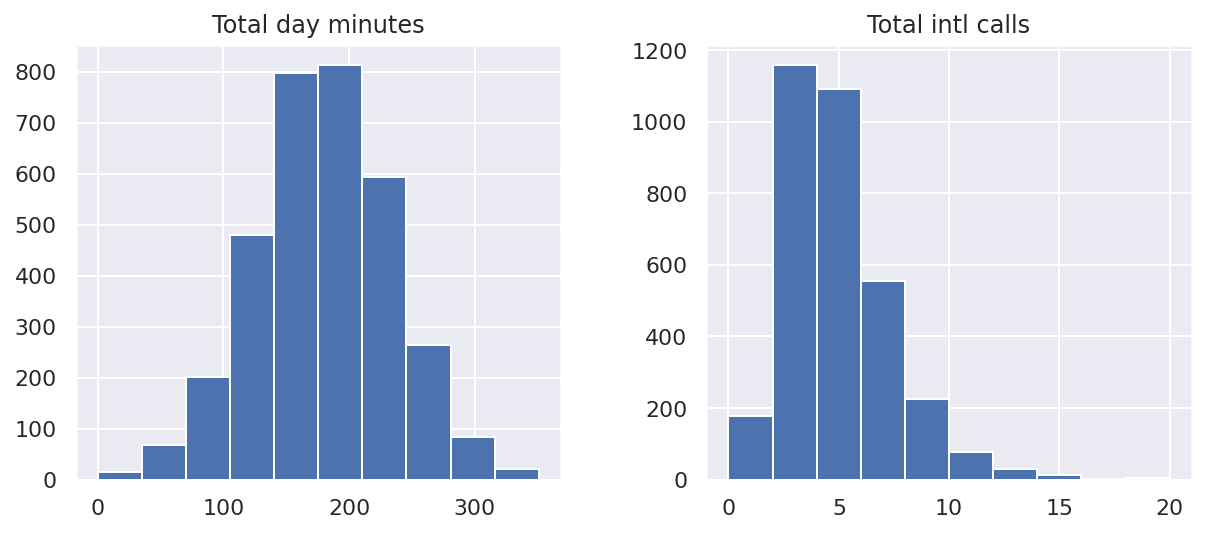

In [ ]:
features = ["Total day minutes", "Total intl calls"]
df[features].hist(figsize=(10, 4));

O histogramă grupează valorile în *bins* cu un interval de valori egale. Forma histogramei poate conține indicii cu privire la tipul de distribuție care stă la baza acesteia: Gaussiană, exponențială etc. De asemenea, puteți detecta orice asimetrie (skewness) în forma sa atunci când distribuția este aproape regulată, dar prezintă unele anomalii. Cunoașterea distribuției valorilor caracteristicilor devine importantă atunci când utilizați metode de învățare automată care presupun un anumit tip (cel mai adesea Gaussiană).

În graficul de mai sus, observăm că variabila *Total day minutes* este distribuită în mod normal, în timp ce *Total intl calls* este în mod proeminent înclinată spre dreapta (coada sa este mai lungă în dreapta).

Există, de asemenea, un alt mod, adesea mai clar, de a înțelege distribuția: *graficele de densitate* sau, mai formal, *graficele de densitate Kernel*. Acestea pot fi considerate o versiune [netezit](https://en.wikipedia.org/wiki/Kernel_smoother) (smoothed) a histogramei. Principalul lor avantaj față de graficele cu histogramă este că nu depind de dimensiunea binarelor. Să creăm diagrame de densitate pentru aceleași două variabile:

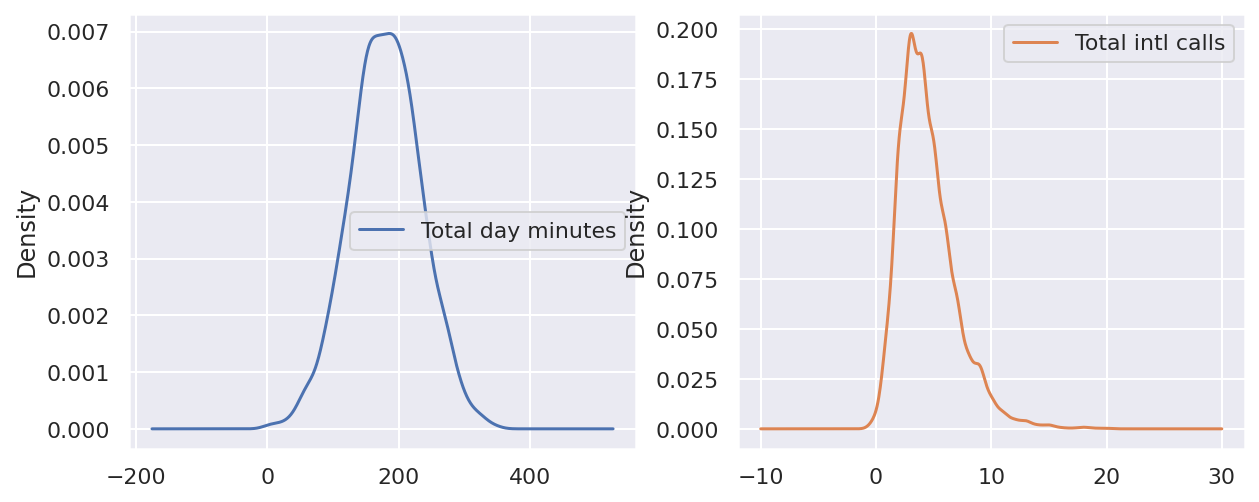

In [ ]:
df[features].plot(
    kind="density", subplots=True, layout=(1, 2), sharex=False, figsize=(10, 4)
);

De asemenea, este posibil de afișat distribuția observațiilor cu `seaborn` [`distplot()`](https://seaborn.pydata.org/generated/seaborn.distplot.html). De exemplu, să ne uităm la distribuția *Total day minutes*. În mod implicit, graficul afișează atât histograma precum și [estimarea densității kernelului](https://en.wikipedia.org/wiki/Kernel_density_estimation) (KDE) deasupra.

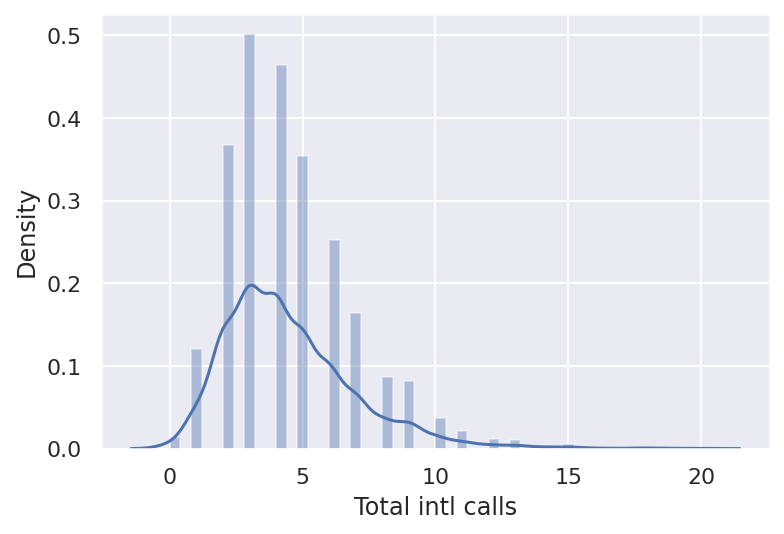

In [ ]:
sns.distplot(df["Total intl calls"]);

Înălțimea barelor histogramei este normalizată și arată mai degrabă densitatea decât numărul de exemple din fiecare bin.

##### Box plot

Un alt tip util de vizualizare este *box plot*. `seaborn` face o treabă excelentă aici:

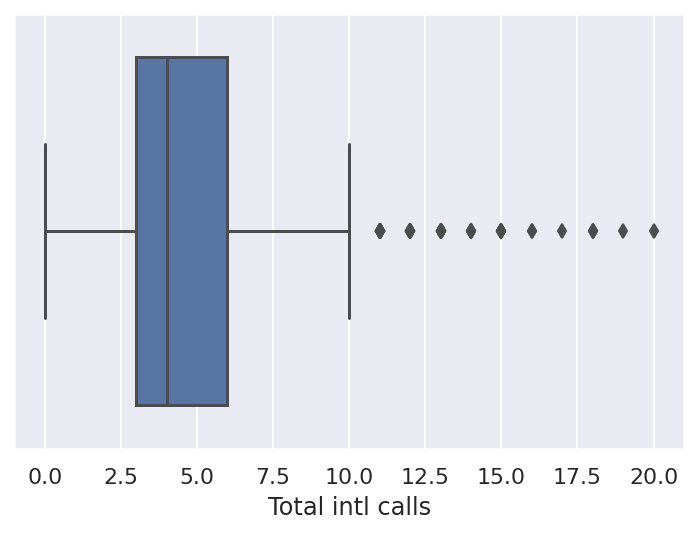

In [ ]:
sns.boxplot(x="Total intl calls", data=df);

Include this image in colab: https://en.wikipedia.org/wiki/Interquartile_range#/media/File:Boxplot_vs_PDF.svg

Să vedem cum se interpretează un box plot. Componentele sale sunt un *box* - casetă (evident, de aceea se numește *box plot*), așa-numitele *mustăți* și un număr de puncte individuale (*outliers*).

Caseta (box) în sine ilustrează răspândirea distribuției pe quartile; lungimea sa este determinată de percentilele de 25$, (\text{Q1})$ și 75$, (\text{Q3})$. Linia verticală din interiorul casetei marchează mediana ($50\%$) distribuției. 

Mustățile sunt liniile care se extind înafara casetei. Ele reprezintă întreaga dispersie a punctelor de date, mai exact punctele care se încadrează în intervalul $(\text{Q1} - 1,5 \cdot \text{IQR}, \text{Q3} + 1,5 \cdot \text{IQR})$, unde $\text{IQR} = \text{Q3} - \text{Q1}$ este [intervalul interquartil].

Valorile anormale care se situează în afara intervalului delimitat de "mustăți" sunt reprezentate individual ca puncte negre de-a lungul axei centrale.

Se poate observa că un număr mare de apeluri internaționale este destul de rar în datele noastre.

##### Parcela de vioară (Violin plot)

Ultimul tip de diagrame de distribuție pe care îl vom lua în considerare este un *grafic de vioară (violin plot)*.

În figurile de mai jos, în stânga, vedem deja cunoscutul box plot; în dreapta, există un *violin plot* cu estimarea densității kernelului pe ambele părți.

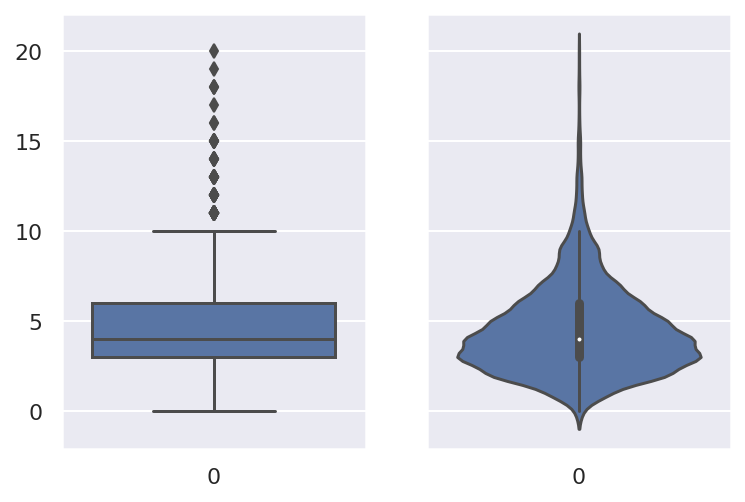

In [ ]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(6, 4))
sns.boxplot(data=df["Total intl calls"], ax=axes[0])
sns.violinplot(data=df["Total intl calls"], ax=axes[1]);

Diferența dintre diagramele de tip "box" și "vioară" constă în faptul că primul ilustrează anumite statistici referitoare la exemple individuale dintr-un set de date, în timp ce graficul "vioară" se concentrează mai mult pe distribuția netezită ca întreg.

În cazul nostru, graficul cu vioară nu contribuie cu informații suplimentare despre date, deoarece totul este clar doar din graficul cu casete.

##### describe()

Pe lângă instrumentele grafice, pentru a obține statisticile numerice exacte ale distribuției folosind metoda [`describe()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html) of a `DataFrame`:

In [ ]:
df[features].describe()

,Total day minutes,Total intl calls
count,3333.00,3333.00
mean,179.78,4.48
std,54.47,2.46
min,0.00,0.00
25%,143.70,3.00
50%,179.40,4.00
75%,216.40,6.00
max,350.80,20.00


Rezultatul său este în mare parte autoexplicativ. *25%*, *50%* și *75%* sunt [percentilele] corespunzătoare.(https://en.wikipedia.org/wiki/Percentile).

#### 2.2 Caracteristici categorice și binare

*Caracteristicile categoriale (categorical features)* iau un număr fix de valori. Fiecare dintre aceste valori atribuie o observație unui grup corespunzător, cunoscut sub numele de *categorie*, care reflectă o anumită proprietate calitativă a acestui exemplu. *Variabilele binare* sunt un caz special important al variabilelor categorice atunci când numărul de valori posibile este exact 2. Dacă valorile unei variabile categorice sunt ordonate, aceasta se numește *ordinară (ordinal)*.


##### Tabel de frecvențe

Să verificăm echilibrul clasei în setul nostru de date, analizând distribuția variabilei țintă: *churn rate*. În primul rând, vom obține un tabel de frecvențe, care arată cât de frecventă este fiecare valoare a variabilei categorice. Pentru aceasta, vom utiliza metoda [`value_counts()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html):

In [ ]:
df["Churn"].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

În mod implicit, rândurile din rezultat sunt sortate de la valorile cele mai frecvente la cele mai puțin frecvente.

În cazul nostru, datele nu sunt *echilibrate*, adică cele două clase target, clienții loiali și neloiali, nu sunt reprezentate în mod egal în setul de date. Doar o mică parte dintre clienți și-au anulat abonamentul la serviciul de telecomunicații. După cum vom vedea în lecțiile următoare, acest fapt poate implica unele restricții în măsurarea performanței de clasificare și, în viitor, este posibil să dorim să penalizăm suplimentar erorile modelului nostru în prezicerea clasei minoritare "Churn".

##### Bar plot

Graficul cu bare este o reprezentare grafică a tabelului de frecvențe. Cel mai ușor mod de creare a unui astfel de grafic este folosind funția de la `seaborn` [`countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html). Există o altă funcție în `seaborn` care se numește oarecum confuz [`barplot()`](https://seaborn.pydata.org/generated/seaborn.barplot.html) și este utilizată în principal pentru reprezentarea unor statistici de bază ale unei variabile numerice grupate după o caracteristică categorică.

Să reprezentăm grafic distribuțiile pentru două variabile categorice:

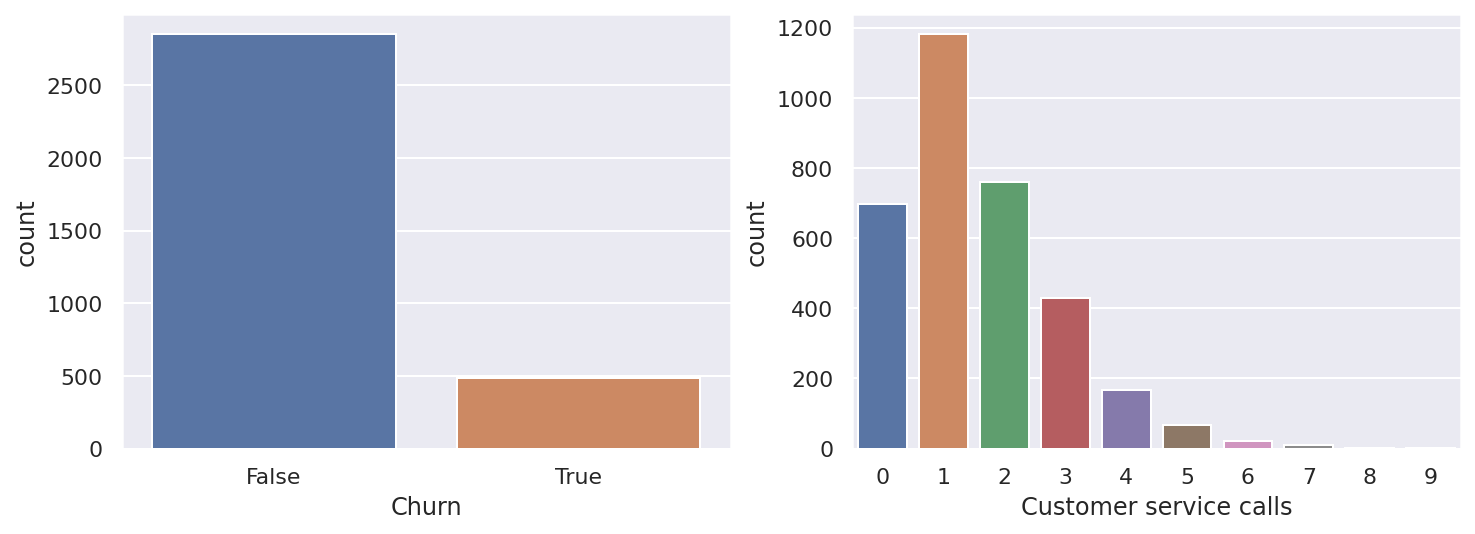

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

sns.countplot(x="Churn", data=df, ax=axes[0])
sns.countplot(x="Customer service calls", data=df, ax=axes[1]);

În timp ce histogramele, discutate mai sus, și diagramele cu bare pot părea similare, există câteva diferențe între ele:
1. *Histogramele* sunt cele mai potrivite pentru a examina distribuția variabilelor numerice, în timp ce *graficele cu bare* sunt utilizate pentru caracteristicile categoriale.
2. Valorile de pe axa X în *histogramă* sunt numerice; un *bar plot* poate avea orice tip de valori pe axa X: numere, șiruri de caractere, booleans.
3. Axa X a *histogramei* este o *axă de coordonate carteziene* de-a lungul căreia valorile nu pot fi modificate; ordonarea *barrelor* nu este predefinită. Cu toate acestea, este util să se observe că barele sunt adesea ordonate după înălțime, adică după frecvența valorilor. De asemenea, atunci când luăm în considerare variabile *ordinale* (cum ar fi *Customer service calls* din datele noastre), barele sunt de obicei ordonate în funcție de valoarea caracteristicii.

Graficul din stânga de mai sus ilustrează în mod clar dezechilibrul variabilei noastre target. Graficul cu bare pentru *Customer service calls* din dreapta ne dă un indiciu că majoritatea clienților își rezolvă problemele în maximum 2-3 apeluri. Dar, deoarece dorim să putem prezice clasa minoritară, am putea fi mai interesați de modul în care se comportă clienții mai puțin nemulțumiți. Este foarte posibil ca în coada acestei diagrame de bare să se afle cea mai mare parte a clienții care decid să plece de la compania de telecomunicații (churn). Deocamdată, acestea sunt doar ipoteze, așa că haideți să trecem la câteva tehnici vizuale mai interesante și mai eficace.

## 3. Vizualizare multivariată

Graficele *multivariate* ne permit să vedem relațiile dintre două sau mai multe variabile diferite, toate într-o singură figură. La fel ca în cazul graficelor univariate, tipul specific de vizualizare va depinde de tipurile de variabile analizate.

#### 3.1 Cantitativ vs. cantitativ

##### Matricea de corelație (Correlation matrix)

Să ne uităm la corelațiile dintre variabilele numerice din setul nostru de date. Este important să cunoaștem aceste informații, deoarece există algoritmi de învățare automată (de exemplu, regresia liniară și logistică) care nu se descurcă bine cu variabilele de intrare foarte corelate.

Întâi vom folosi metoda [`corr()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) a unui `DataFrame` pentru a calcula corelația dintre fiecare pereche de caracteristici. Apoi, trecem *matricea de corelație* rezultată ca parametru de intrare la funcția [`heatmap()`](https://seaborn.pydata.org/generated/seaborn.heatmap.html) din `seaborn`, care redă o matrice cu coduri de culori pentru valorile furnizate:

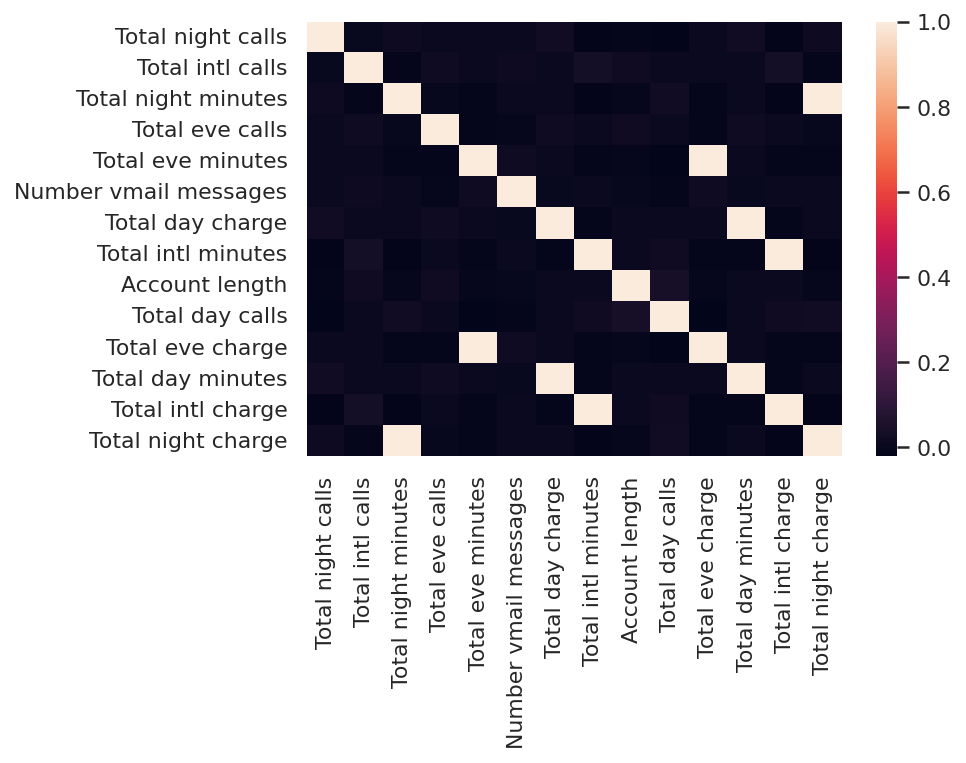

In [ ]:
# Drop non-numerical variables
numerical = list(
    set(df.columns)
    - {
        "State",
        "International plan",
        "Voice mail plan",
        "Area code",
        "Churn",
        "Customer service calls",
    }
)

# Calculate and plot
corr_matrix = df[numerical].corr()
sns.heatmap(corr_matrix);

Din matricea de corelație colorată generată mai sus, putem observa că există 4 variabile, cum ar fi *Total day charge*, care au fost calculate direct din numărul de minute petrecute la apeluri telefonice (*Total day minutes*). Acestea se numesc *variabile dependente* și, prin urmare, pot fi lăsate deoparte, deoarece nu contribuie cu nicio informație suplimentară. Să scăpăm de ele:

In [ ]:
numerical = list(
    set(numerical)
    - {
        "Total day charge",
        "Total eve charge",
        "Total night charge",
        "Total intl charge",
    }
)

##### Diagramă de dispersie ( Scatter plot)

Graficul *scatter plot* afișează valorile a două variabile numerice sub formă de *coordonate carteziene* în spațiul 2D. De asemenea, sunt posibile și diagramele de dispersie în 3D.

Să încercăm funcția [`scatter()`](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.scatter.html) din biblioteca `matplotlib`:

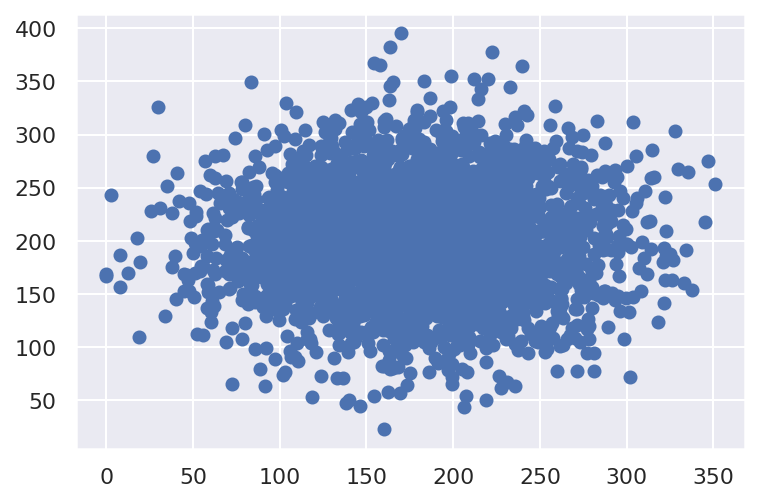

In [ ]:
plt.scatter(df["Total day minutes"], df["Total night minutes"]);

Obținem o imagine neinteresantă a două variabile distribuite normal. De asemenea, se pare că aceste caracteristici nu sunt corelate, deoarece forma asemănătoare unei elipse este aliniată cu axele.

Există o opțiune puțin mai sofisticată pentru a crea un grafic de dispersie cu ajutorul bibliotecii `seaborn`:

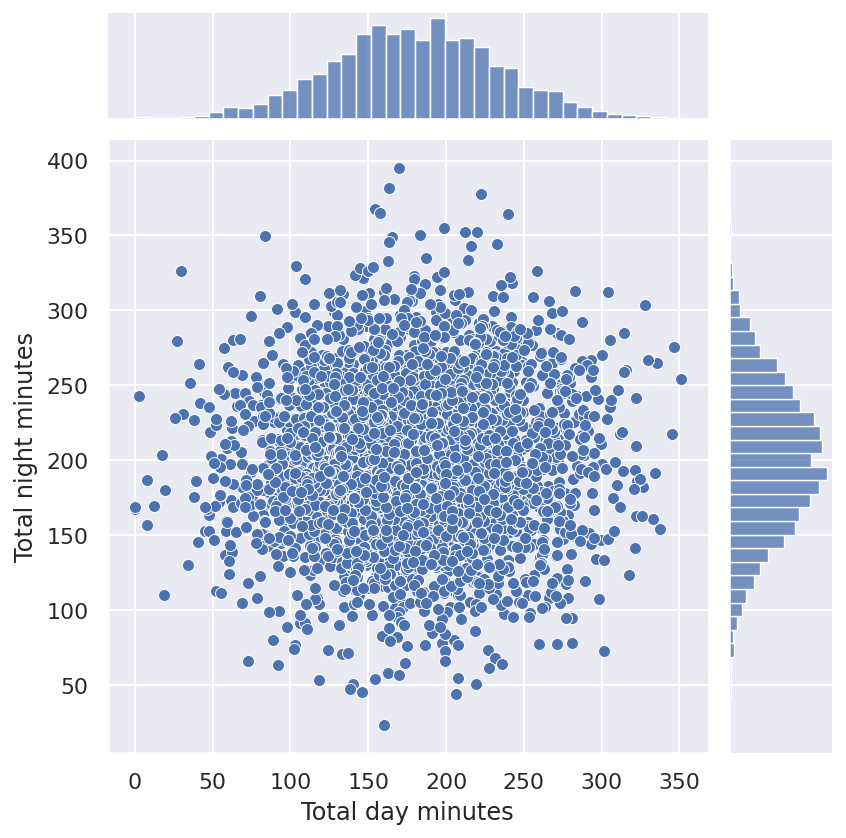

In [ ]:
sns.jointplot(x="Total day minutes", y="Total night minutes", data=df, kind="scatter");

Funcția [`jointplot()`](https://seaborn.pydata.org/generated/seaborn.jointplot.html) afișează două histograme care pot fi utile în unele cazuri.

Utilizând aceeași funcție, putem obține și o versiune netezită (smoothed kernel distribution) a distribuției noastre bivariate:

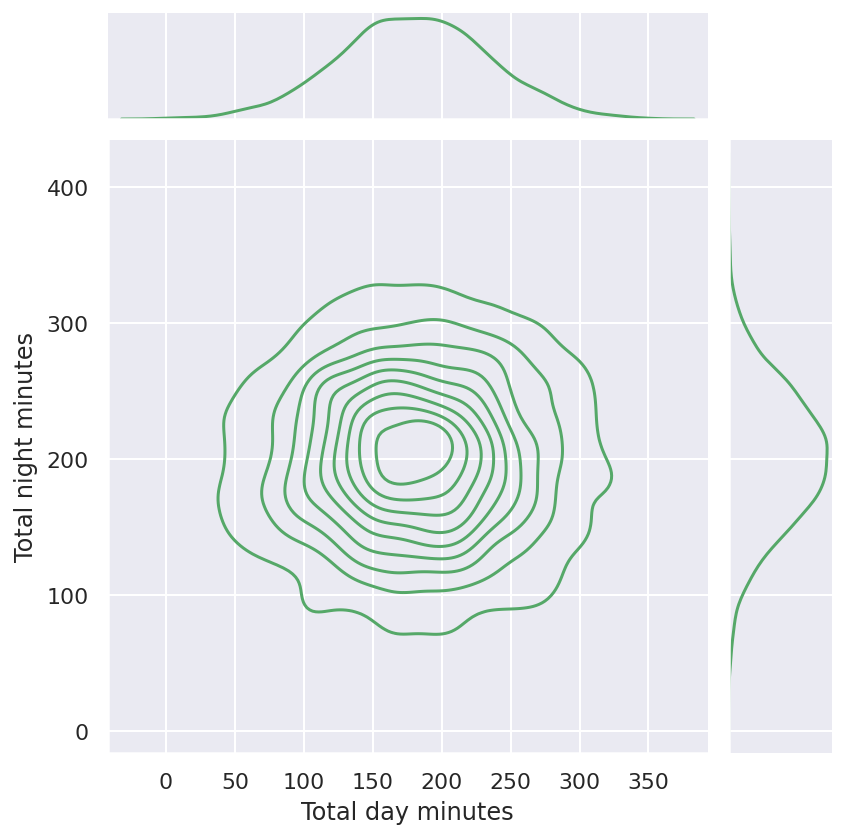

In [ ]:
sns.jointplot(
    "Total day minutes", "Total night minutes", data=df, kind="kde", color="g"
);

Aceasta este practic o versiune bivariată a *Kernel Density Plot* discutată anterior.

##### Matricea Scatterplot (Scatterplot matrix)

În unele cazuri, este posibil să dorim să afișăm o *matrice de dispersie (scatterplot matrix)* precum cea prezentată mai jos. Diagonala acesteia conține distribuțiile variabilelor corespunzătoare, și diagramele de dispersie pentru fiecare pereche de variabile completează restul matricei.

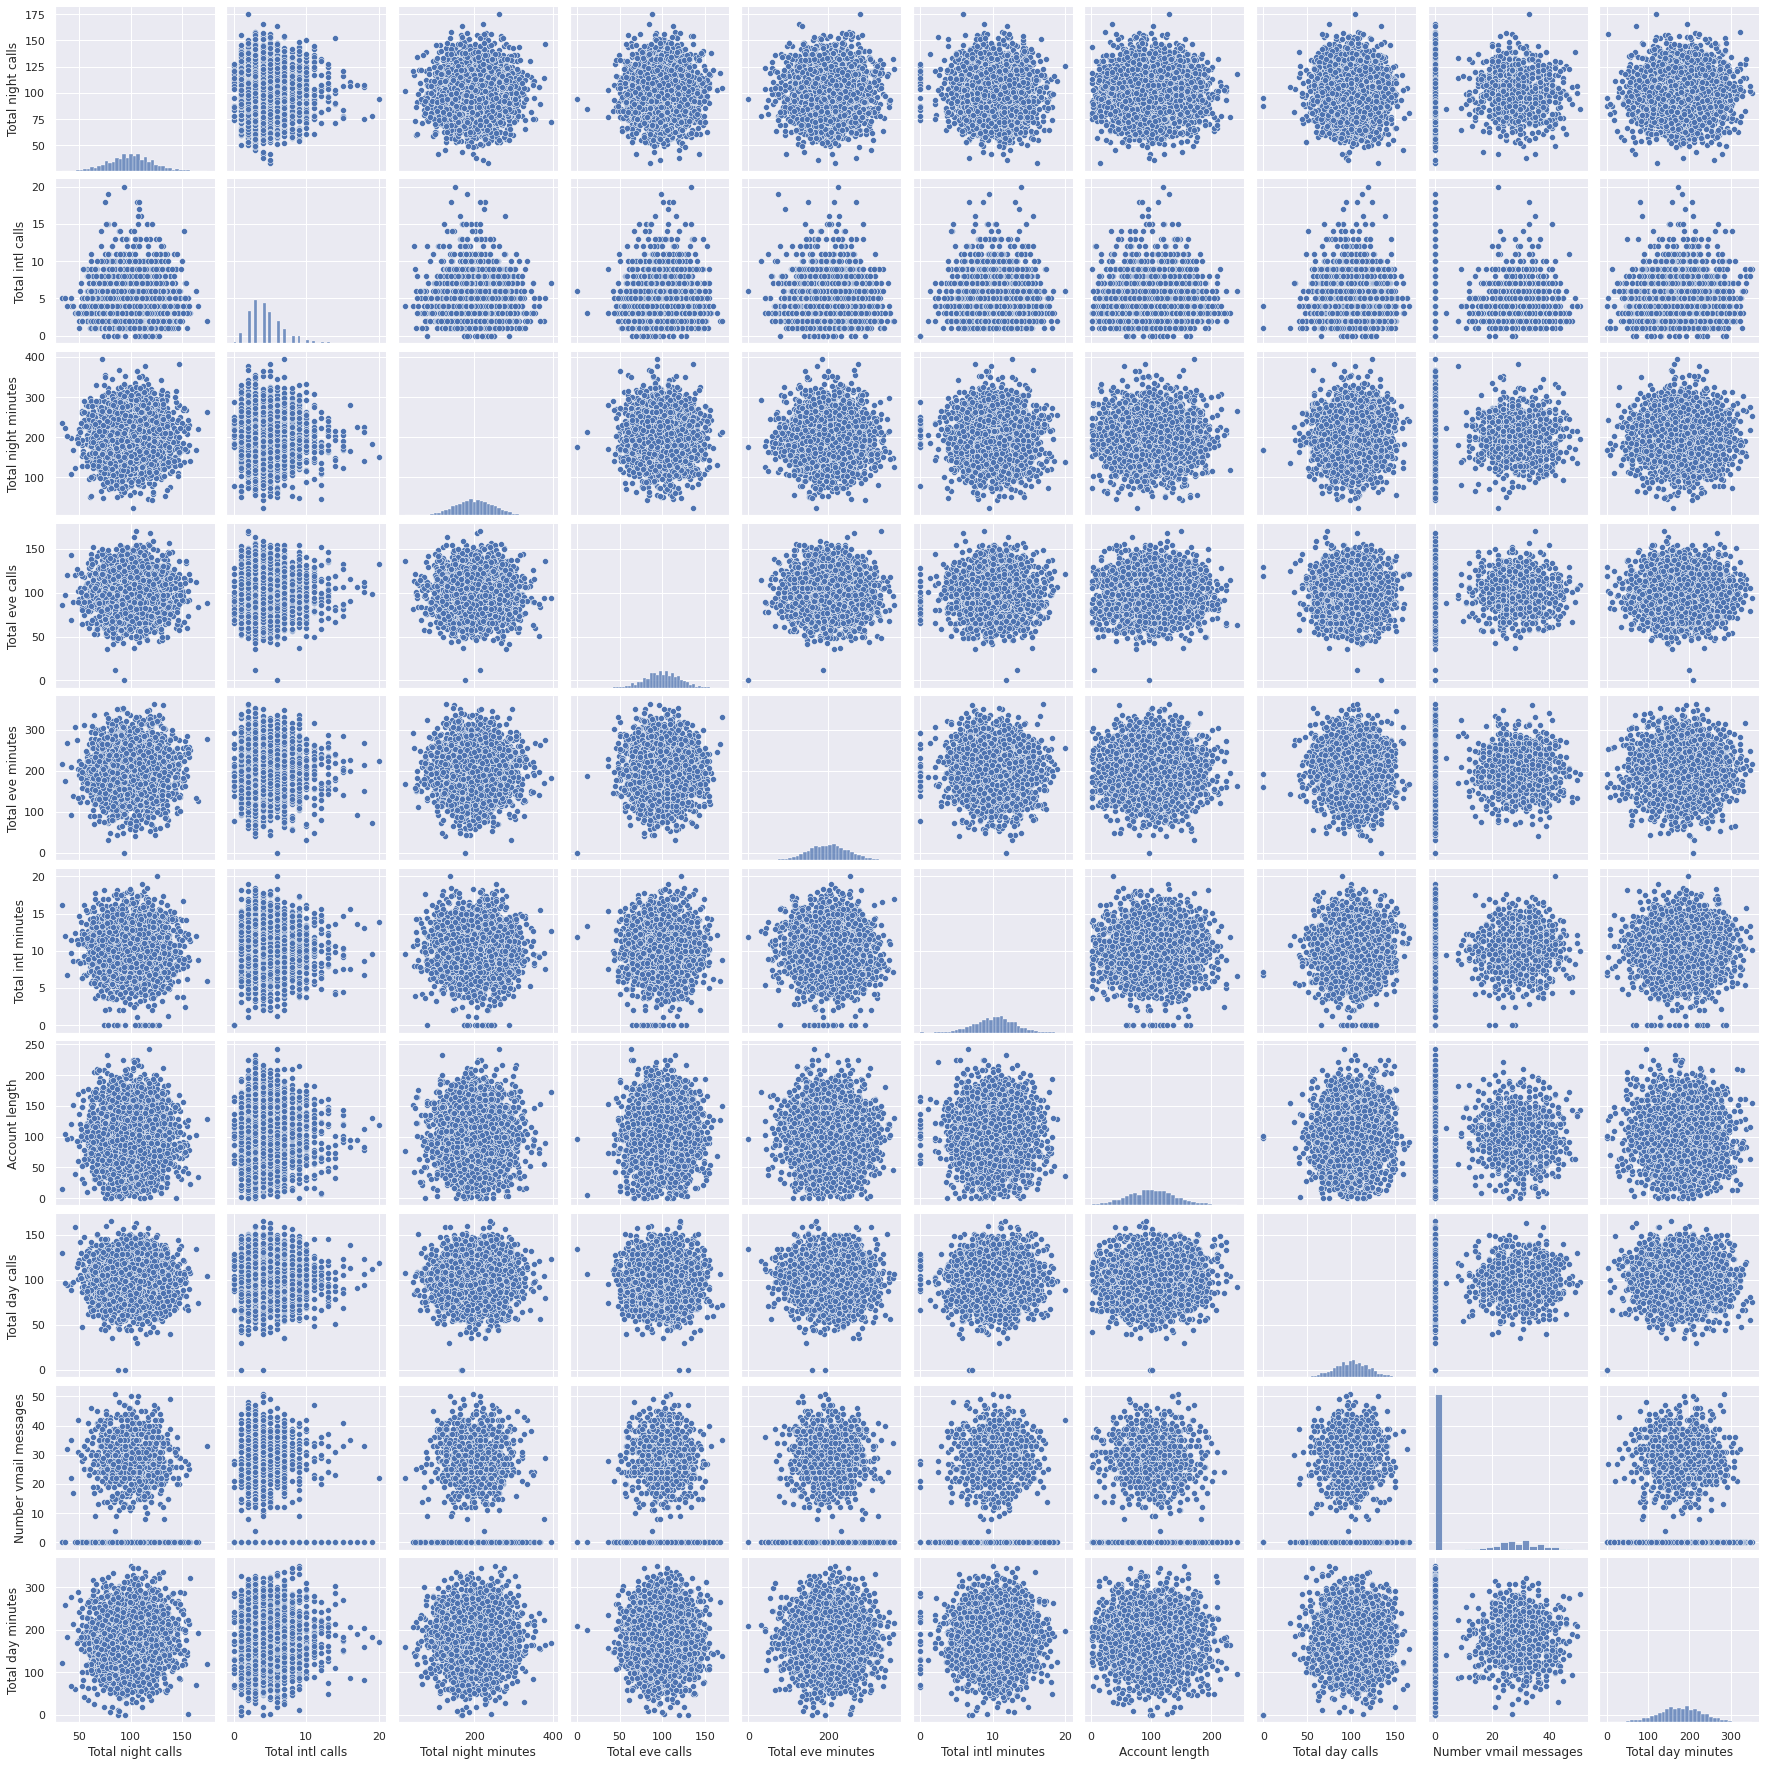

In [ ]:
# `pairplot()` may become very slow with the SVG or retina format
%config InlineBackend.figure_format = 'png'
sns.pairplot(df[numerical]);

In [ ]:
%config InlineBackend.figure_format = 'retina'

#### 3.2 Valori cantitative vs. categoriale

În această secțiune, vom face ca simplele noastre diagrame cantitative să fie puțin mai interesante. Vom încerca să obținem noi informații pentru predicția ratei de churn din interacțiunile dintre caracteristicile numerice și cele categoriale.

Mai exact, să vedem cum sunt legate variabilele de intrare de variabila target Churn.

Anterior, ați învățat despre diagramele de dispersie. Punctele acestora pot fi codificate prin culoare sau mărime, astfel încât valorile unei a treia variabile categoriale să fie prezentate și ele în aceeași figură. Putem realiza acest lucru cu funcția `scatter()` văzută mai sus, dar, să încercăm o nouă funcție numită [`lmplot()`](https://seaborn.pydata.org/generated/seaborn.lmplot.html) și să folosim parametrul `hue` pentru a indica caracteristica noastră categorică de interes:

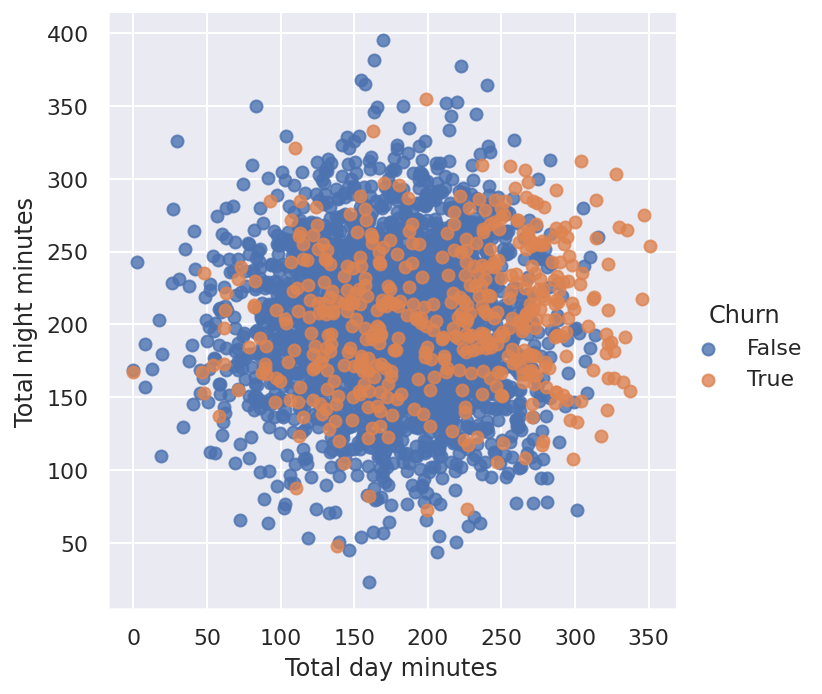

In [ ]:
sns.lmplot(
    "Total day minutes", "Total night minutes", data=df, hue="Churn", fit_reg=False
);

Se pare că mica noastră proporție de clienți neloiali se înclină spre colțul din dreapta sus; adică, acești clienți tind să petreacă mai mult timp la telefon atât ziua, cât și noaptea. Dar acest lucru nu este absolut clar și nu vom face concluzii definitive din acest grafic.

Acum, să creăm diagrame box-plot pentru a vizualiza statisticile de distribuție ale variabilelor numerice în două grupuri disjuncte: clienții loiali (`Churn=False`) și cei care au plecat (`Churn=True`).

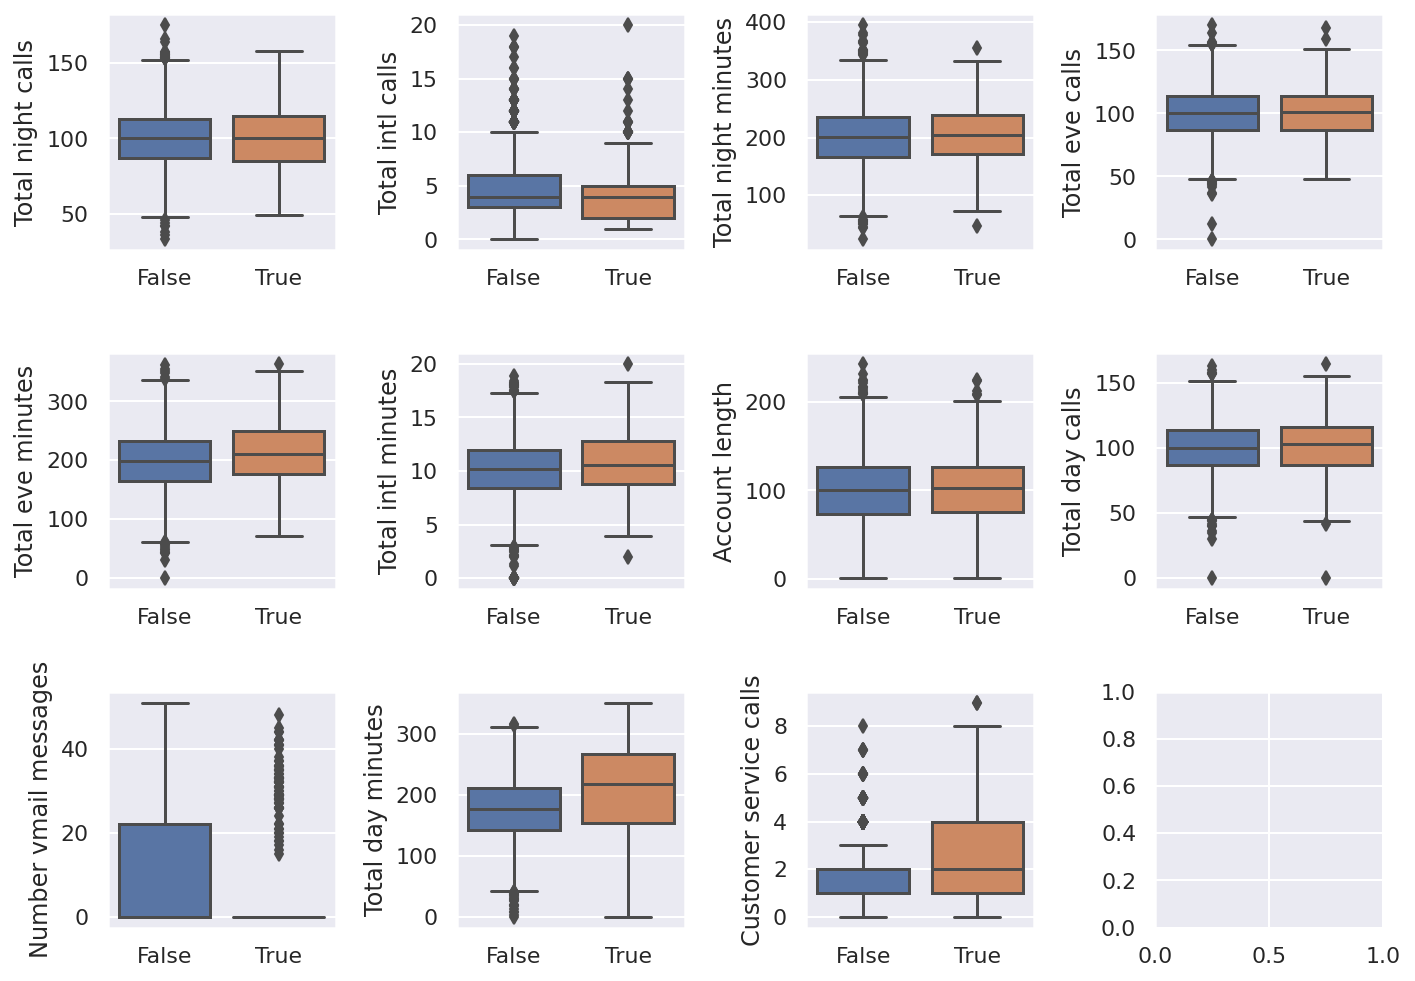

In [ ]:
# Sometimes you can analyze an ordinal variable just as numerical one
numerical.append("Customer service calls")

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 7))
for idx, feat in enumerate(numerical):
    ax = axes[int(idx / 4), idx % 4]
    sns.boxplot(x="Churn", y=feat, data=df, ax=ax)
    ax.set_xlabel("")
    ax.set_ylabel(feat)
fig.tight_layout();

Din acest grafic, se poate observa că cea mai mare discrepanță în distribuția dintre cele două grupuri este pentru trei variabile: *Total day minutes*, *Customer service calls* și *Number vmail messages*. Mai târziu, în acest curs, vom învăța cum să determinăm importanța caracteristicilor în clasificare folosind *Random Forest*; acolo, vom vedea că primele două caracteristici sunt într-adevăr foarte importante pentru predicția ratei de churn.

Să ne uităm la distribuția minutelor de zi vorbite pentru clienții loiali și neloiali separat. Vom crea diagrame de box-plot și violin-plot pentru *Total day minutes* grupate în funcție de variabila target.

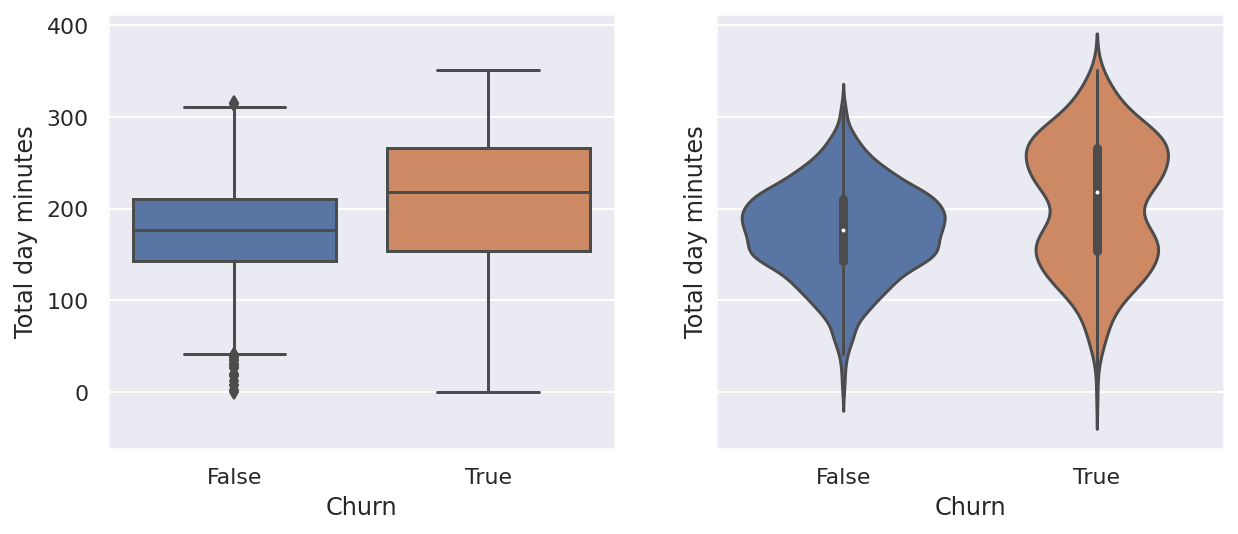

In [ ]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4))

sns.boxplot(x="Churn", y="Total day minutes", data=df, ax=axes[0])
sns.violinplot(x="Churn", y="Total day minutes", data=df, ax=axes[1]);

În acest caz, graficul cu vioară nu contribuie cu nicio informație suplimentară despre datele noastre, deoarece totul este clar doar din graficul box-plot: clienții neloiali tind să vorbească mai mult la telefon.

**O observație interesantă**: în medie, clienții care își întrerup contractele sunt utilizatori mai activi ai serviciilor de comunicații. Poate că aceștia sunt nemulțumiți de tarife, așa că o posibilă măsură de prevenire a dezabonării ar putea fi reducerea tarifelor de apelare. Compania va trebui să efectueze o analiză economică suplimentară pentru a afla dacă astfel de măsuri ar fi benefice.

Atunci când dorim să analizăm o variabilă cantitativă în două dimensiuni categorice în același timp, există o funcție adecvată pentru aceasta în biblioteca `seaborn` numită [`catplot()`].(https://seaborn.pydata.org/generated/seaborn.factorplot.html). 
De exemplu, să vizualizăm interacțiunea dintre *Total day minutes* și două variabile categorice în același grafic:

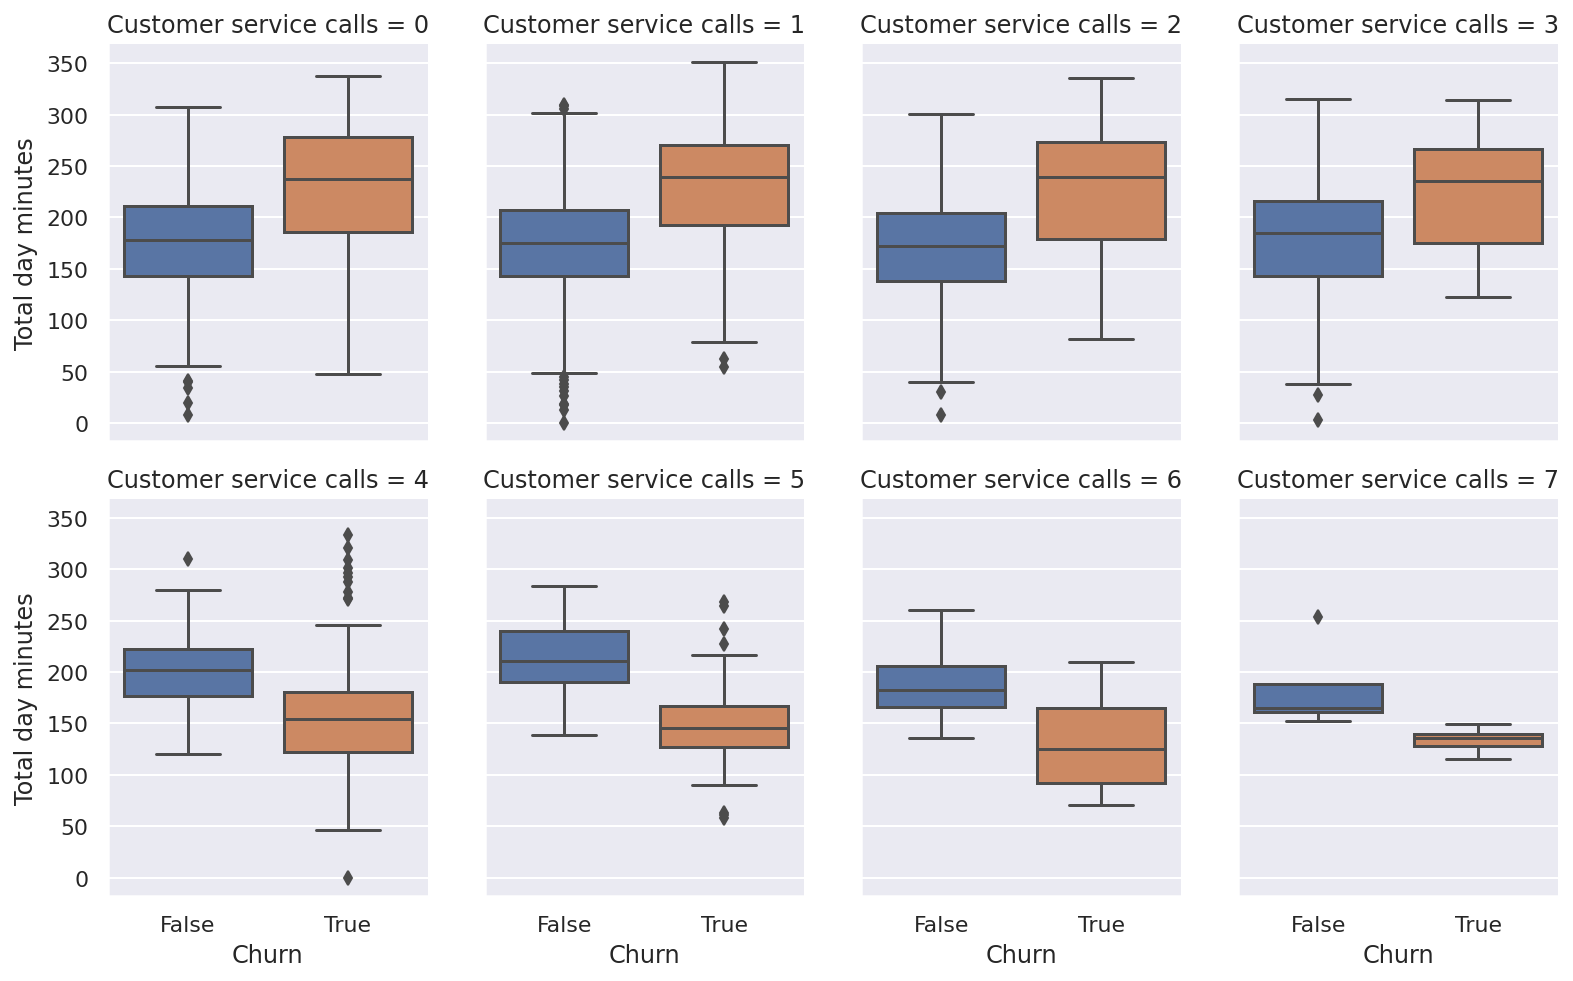

In [ ]:
sns.catplot(
    x="Churn",
    y="Total day minutes",
    col="Customer service calls",
    data=df[df["Customer service calls"] < 8],
    kind="box",
    col_wrap=4,
    height=3.5,
    aspect=0.8,
);

De aici am putea concluziona că, începând cu 4 apeluri, *Total day minutes* nu mai poate fi principalul factor de dezabonare a clienților. Poate că, pe lângă presupunerea noastră anterioară privind tarifele (taxele), există clienți care sunt nemulțumiți de serviciu din cauza altor probleme, ceea ce ar putea duce la un număr mai mic de minute pe zi petrecute pe apeluri.

#### 3.3 Caracteristici categorice vs. categorice

După cum am văzut mai devreme în acest articol, variabila *Customer service calls* are puține valori unice și, prin urmare, poate fi considerată fie numerică, fie ordinală. Am văzut deja distribuția sa cu ajutorul unui *count plot*. Acum, suntem interesați de relația dintre această caracteristică ordinală și variabila țintă *Churn*.

Să analizăm distribuția numărului de apeluri la serviciul clienți, utilizând din nou un *count plot*. De data aceasta, să trecem și parametrul `hue=Churn`, care adaugă o dimensiune categorială la grafic:

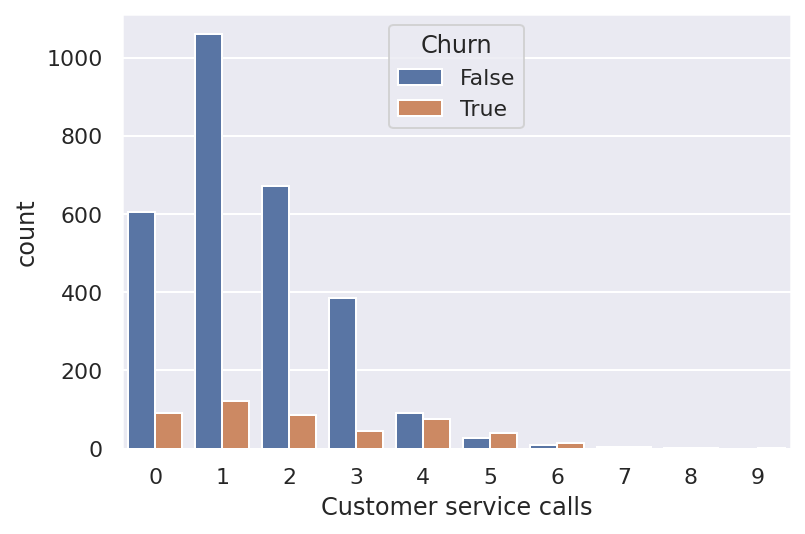

In [ ]:
sns.countplot(x="Customer service calls", hue="Churn", data=df);

**Observație**: rata de dezabonare crește semnificativ după 4 sau mai multe apeluri la serviciul clienți.

Acum, să analizăm relația dintre *Churn* și caracteristicile binare, *nternational plan* și *Voice mail plan*.

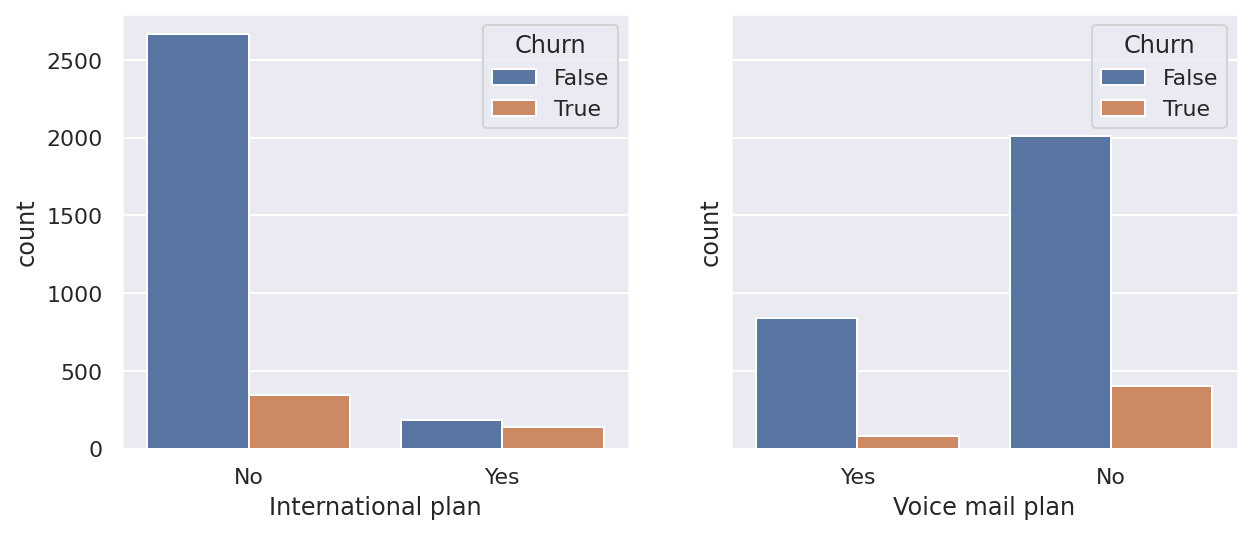

In [ ]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4))

sns.countplot(x="International plan", hue="Churn", data=df, ax=axes[0])
sns.countplot(x="Voice mail plan", hue="Churn", data=df, ax=axes[1]);

**Observație**: atunci când este activat *International Plan*, rata de dezabonare este mult mai mare; utilizarea planului internațional de către client este o caracteristică puternică. Nu observăm același efect cu *Voice mail plan*.